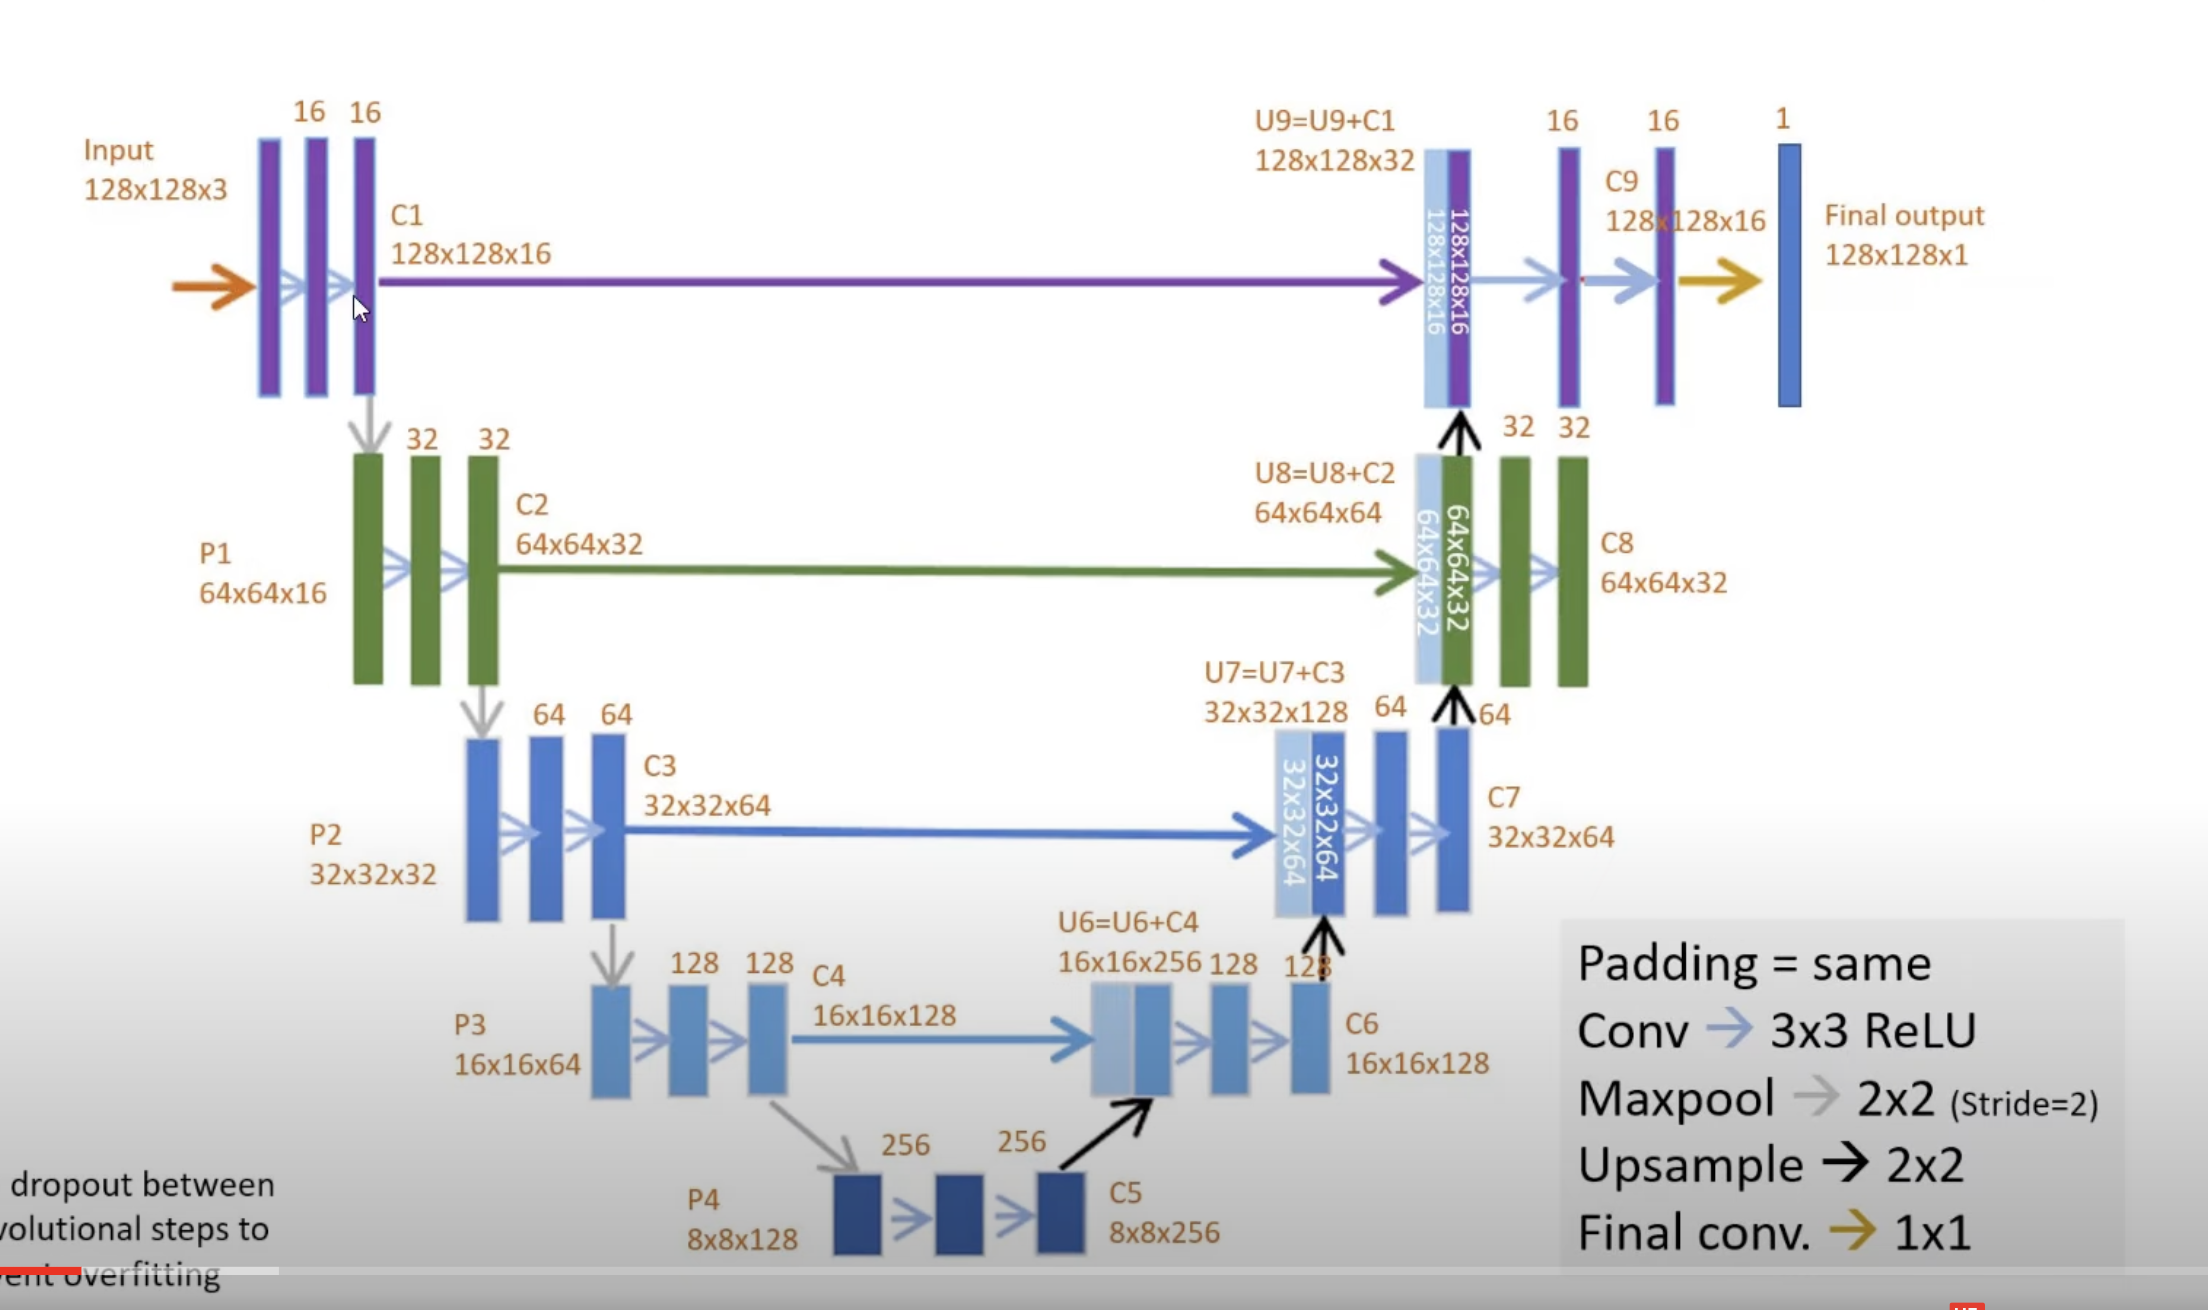

In [ ]:
import tensorflow as tf

#to read through files and stuff
import os

train_path='stage1_train/'
test_path='stage1_test/'

train_ids = next(os.walk(train_path))

img_widhth=128
img_height=128
img_channels=3

# build the model - use the layers model in keras

#first thing is build the input layer:
inputs = tf.keras.layers.Input((img_widhth,img_height,img_channels))

#convolutional layers

#kernel_initliazer -- defines the inital values, or the initial weights that we are going to apply to our image

#layers only takes in floating point values, so you might have to convert the image from 8bit to floating point
#so to do above by 255 (cause for images every value is 0 to 255)

#lambda function to convert to floating point
s=tf.keras.layers.Lambda(lambda x :x/255)(inputs)

#contracting path

c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(s)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout(0.1)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p3)
c4=tf.keras.layers.Dropout(0.1)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p4)
c5=tf.keras.layers.Dropout(0.1)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c5)

#expansive path

u6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u6)
c6=tf.keras.layers.Dropout(0.1)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c6)

u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u7)
c7=tf.keras.layers.Dropout(0.1)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c7)


u8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u8)
c8=tf.keras.layers.Dropout(0.1)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c8)

u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9=tf.keras.layers.concatenate([u9,c1],axis=3)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u9)
c9=tf.keras.layers.Dropout(0.1)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c9)


#the dropout helps to prevent opverfitting
outputs=tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

#optimizer is just a module that has a bunch of backprop algos to train data
model=tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

# fit the model to some data

#callbacks
#callbacks.modelcheckpoint -- where you can create timestamps, so your nn can take forever to run and this will let you save events or weights,etc
#callback.earlystoping -- 2 many epochs means overfitting, 2 less is underfitting, you can pick a value you would like to monitor like validation loss and you can say if there is no improvment stop it, use the patience input
#tensorboard

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),
    tf.keras.callbacks.Tensorboard(log_dir='logs')
]

#performing this on the 2018 data science bowl, find the nuclei in divergent images to advance medical discovery

results=model.fit(x,y,validation_split=0.1,batch_size=16,epochs=25,callbacks=callbacks)


In [ ]:
import tensorflow as tf

#to read through files and stuff
import os

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import random

IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=3


TRAIN_PATH="/Users/tj/Downloads/data-science-bowl-2018/stage1_train/"
TEST_PATH="/Users/tj/Downloads/data-science-bowl-2018/stage1_test/"

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print("fuvck off")

# basically whats happening below is like we start at train path and id which gers us to the first image in the images folder,
#then we reshape that and id is incremented so go to next picture and resahpe, etc

#for the mask at every pixel in every mask you are getting the max value and basically reconstructing one image out of all these seperate masks



print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)

    Y_train[n] = mask

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')




# santy check - to see if the pictures are correct

image_x=random.randint(0,len(train_ids))
imshow(X_train[image_x])
plt.show()

imshow(np.squeeze(Y_train[image_x]))
plt.show()








# build the model - use the layers model in keras

#first thing is build the input layer:
inputs = tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))

#convolutional layers

#kernel_initliazer -- defines the inital values, or the initial weights that we are going to apply to our image

#layers only takes in floating point values, so you might have to convert the image from 8bit to floating point
#so to do above by 255 (cause for images every value is 0 to 255)

#lambda function to convert to floating point
s=tf.keras.layers.Lambda(lambda x :x/255)(inputs)

#contracting path

c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(s)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout(0.1)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p3)
c4=tf.keras.layers.Dropout(0.1)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(p4)
c5=tf.keras.layers.Dropout(0.1)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c5)

#expansive path

u6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u6)
c6=tf.keras.layers.Dropout(0.1)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c6)

u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u7)
c7=tf.keras.layers.Dropout(0.1)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c7)


u8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u8)
c8=tf.keras.layers.Dropout(0.1)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c8)

u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9=tf.keras.layers.concatenate([u9,c1],axis=3)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(u9)
c9=tf.keras.layers.Dropout(0.1)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer= 'he_normal',padding='same')(c9)


#the dropout helps to prevent opverfitting
outputs=tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

#optimizer is just a module that has a bunch of backprop algos to train data
model=tf.keras.Model(inputs=[inputs],outputs=[outputs])
#can either be a neuron or not, ie thats why your using binary_crossentropy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

# fit the model to some data

#callbacks
#callbacks.modelcheckpoint -- where you can create timestamps, so your nn can take forever to run and this will let you save events or weights,etc
#callback.earlystoping -- 2 many epochs means overfitting, 2 less is underfitting, you can pick a value you would like to monitor like validation loss and you can say if there is no improvment stop it, use the patience input
#tensorboard

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

#performing this on the 2018 data science bowl, find the nuclei in divergent images to advance medical discovery

results=model.fit(X_train,Y_train,validation_split=0.1,batch_size=16,epochs=25,callbacks=callbacks)

###########################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()



